<h1><center> Fake news Detection </center></h1>

### 1. Make necessary imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### 2. Read the data into a DataFrame

In [2]:
df = pd.read_csv('D:\python_coding\datasets\\news.csv')
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
df.shape

(6335, 4)

### 3. Spliting the dataset into training and testing sets

In [4]:
y = df['label']
x = df['text']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 7)

### 4. Initializing a TfidfVectorizer 

In [6]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words = 'english', max_df = 0.7)

# Fitting and transforming the train set and transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

### 6. Initializing PassiveAggressiveClassifier

In [7]:
# Initializing a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train,y_train)

# Predicting on the test set and calculating accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


#### So, we got the accuracy of 92.58%

### 7. Printing confusion matrix

In [8]:
cm = confusion_matrix(y_test,y_pred,labels = ['FAKE','REAL'])
cm

array([[590,  48],
       [ 42, 587]], dtype=int64)

<AxesSubplot:>

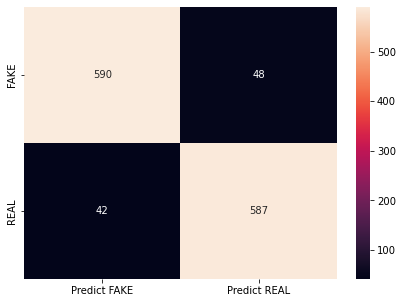

In [9]:
# Visulaizing confusion matrix
cm=metrics.confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])
df_cm=pd.DataFrame(cm,index=[i for i in ["FAKE","REAL"]],columns=[i for i in ["Predict FAKE","Predict REAL"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')